<IPython.core.display.Javascript object>


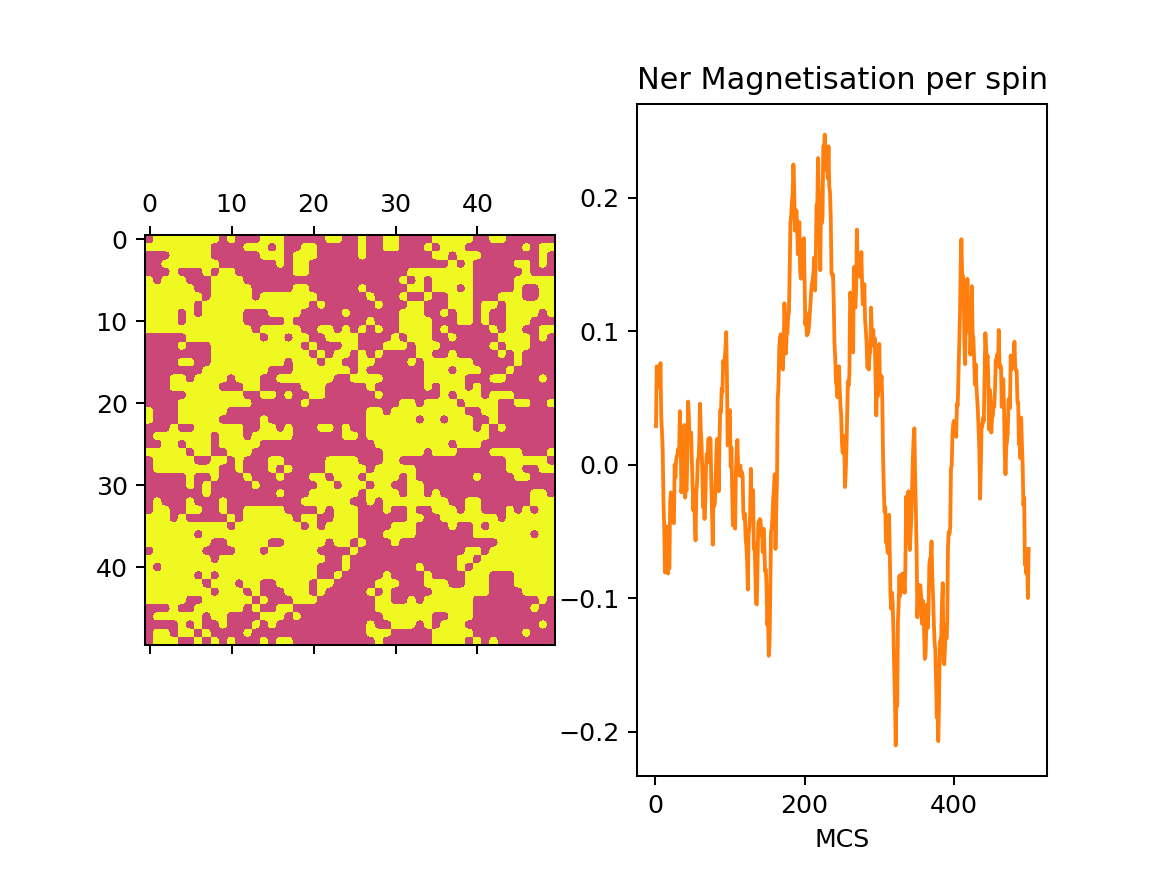

1      0.0288
2      0.0736
3      0.0576
4      0.0656
5      0.0672
6      0.06
7      0.076
8      0.036
9      0.0248
10      0.0104
11      -0.0264
12      -0.0472
13      -0.0808
14      -0.0688
15      -0.0744
16      -0.0464
17      -0.0816
18      -0.076
19      -0.0776
20      -0.0272
21      -0.0208
22      -0.0288
23      -0.024
24      -0.0432
25      -0.044
26      0.0
27      -0.0096
28      0.0032
29      0.0064
30      0.0088
31      0.012
32      0.0088
33      0.04
34      0.0176
35      -0.0208
36      -0.0128
37      -0.0088
38      0.0056
39      0.0296
40      -0.0248
41      -0.0168
42      -0.0192
43      0.0064
44      0.0472
45      0.0376
46      0.0168
47      0.0216
48      0.024
49      0.004
50      -0.0144
51      -0.0344
52      -0.0192
53      -0.0432
54      -0.0568
55      -0.0208
56      -0.0136
57      0.0032
58      0.0048
59      0.0176
60      0.0456
61      0.0256
62      0.016
63      -0.0048
64      -0.032
65      -0.0224
66      -0.0408
67 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from numba import njit
%matplotlib notebook

def largest_primes_under(N):
    n = N - 1
    while n >= 2:
        if all(n % d for d in range(2, int(n ** 0.5 + 1))):
            return n
        n -= 1

@njit
def Neighbors(Lattice,i,j,n=1):
    ''' Returns an flat array of all neighboring sites in the n-th coordination sphere including the center'''
    N, M = Lattice.shape
    rows = np.array([(i-1) % N, i, (i+1) % N])
    cols = np.array([(j-1) % N, j, (j+1) % M])
    return Lattice[rows,:][:,cols].flatten()

@njit
def calc_dE(Lattice, x, y, z):
    N, M = Lattice.shape
    old_energy = 0
    new_energy = 0
    for i in [0,1,-1]:
        for j in [0,1,-1]:
            if i == 0 and j == 0: 
                continue
            if Lattice[x%N,y%M] == Lattice[(x+i)%N,(y+j)%M]:
                old_energy += 1
            elif z == Lattice[(x+i)%N,(y+j)%M]: 
                new_energy += 1 
    return old_energy-new_energy

N, M = 50,50
beta = 1.0/3.0  # Set beta factor in units of energy/temperature (1/beta = 2.27 is Curie temp)
orientations = 2
MCS = int(500)

a = largest_primes_under(N*M)
L = np.random.randint(1,orientations+1,size=(N,M))
ims=[]
mag=[]
mcs=[]

fig, axs = plt.subplots(nrows=1, ncols=2)
mat = axs[0].matshow(L,animated=True,cmap = plt.get_cmap('plasma', orientations+1), vmin = -0.5, vmax = orientations+0.5, interpolation='kaiser')
mvt = axs[1].plot(mcs,mag)
axs[1].set(title='Ner Magnetisation per spin', xlabel='MCS')

for t in range(1,MCS+1):
    rand = np.random.randint(N*M)
    for i in range(0,N**2):
        index = (a*i + rand) % (N**2)
        x = index % N
        y = index // N
        n = Neighbors(L,x,y)
        if len(n)-1 == 0: 
            continue
        else: 
            z = np.random.choice(orientations)+1
        dE = calc_dE(L,x,y,z)
        if  (dE < 0): 
            L[x%N,y%N] = z      
        elif np.random.sample() < np.exp(-dE*beta): 
            L[x%N,y%N] = z
           
    ims.append((axs[0].matshow(L,animated=True,cmap = plt.get_cmap('plasma', orientations+1), vmin = -0.5, vmax = orientations+0.5, interpolation='kaiser'),))
    
    mcs.append(t)
    mag.append((np.sum(np.where(L==1,1,0))-np.sum(np.where(L==2,1,0)))/(N*M))
    print(mcs[t-1],"    ",mag[t-1])  # Print net magnetisation per spin

ani = animation.ArtistAnimation(fig,ims,interval=100,blit=True)
lines = axs[1].plot(mcs,mag)
fig.show()

In [4]:
ani = animation.ArtistAnimation(fig,ims,interval=100,blit=True)
lines = axs[1].plot(mcs,mag)